#Aluna: Saula Cecília

#BOOTCAMP DATA ANALYTICS 2022 WOMAKERSCODE

#25/02/22

## Desafio 1: Entendendo o consumidor

"Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,
pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as
diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar
melhor os seus anúncios. Para isso, eles te enviaram a base de dados
(desafio_01_consumidor.csv). Como você poderia ajudá-los?"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados_desafio01 = pd.read_csv('desafio-01-consumidor.csv')
dados_desafio01.head(5)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


"Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots"

####Análises

In [ ]:
#POR IDADE:
dados_desafio01.groupby(['pre-pandemia', 'idade']) [['produto']].count()


produto
pre-pandemia idade         
0            15           1
             17           2
             22           1
             23           1
             24           2
...                     ...
1            71           1
             74           1
             76           1
             77           1
             80           1

[95 rows x 1 columns]

In [ ]:
#POR REGIÃO DO BRASIL:
dados_desafio01.groupby(['pre-pandemia', 'regiao-BR']) [['produto']].count()


produto
pre-pandemia regiao-BR            
0            Centro-Oeste        8
             Nordeste           25
             Norte               9
             Sudeste            18
             Sul                42
1            Centro-Oeste       17
             Nordeste           26
             Norte               8
             Sudeste            21
             Sul                29

In [ ]:
#POR RENDA:
dados_desafio01.groupby(['pre-pandemia', 'renda']) [['produto']].count()

produto
pre-pandemia renda         
0            1995         1
             3191         1
             4148         1
             5512         1
             5530         1
...                     ...
1            22854        1
             22927        1
             23015        1
             23311        1
             24090        1

[203 rows x 1 columns]

####Histogramas

In [ ]:
import seaborn as sns

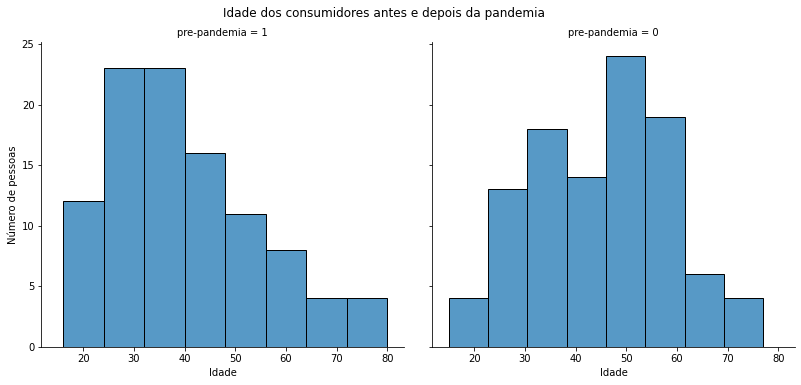

In [ ]:
#GRÁFICO 1:
g = sns.FacetGrid(dados_desafio01, col="pre-pandemia", col_order=[1,0])
g.map(sns.histplot, "idade")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Idade dos consumidores antes e depois da pandemia')
g.set_axis_labels("Idade", "Número de pessoas")
g.figure.set_size_inches(12, 6)

##PRÉ-PANDEMIA = 0: NÃO FOI ANTES DA PANDEMIA
##PRÉ-PANDEMIA = 1: FOI ANTES DA PANDEMIA

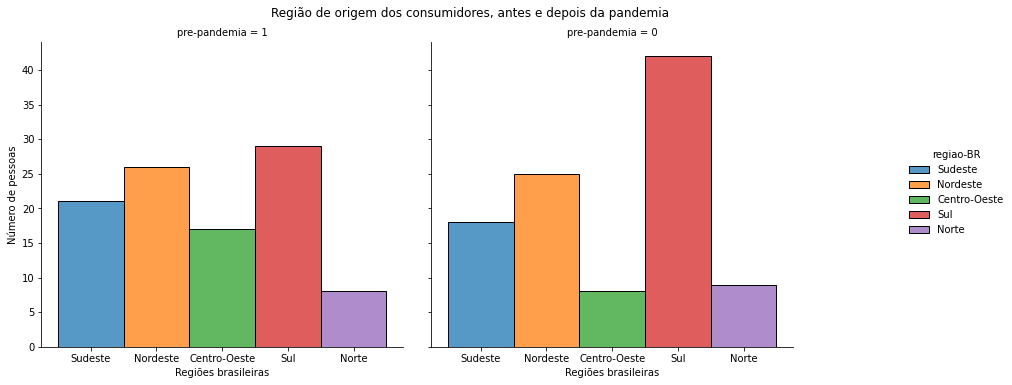

In [ ]:
#GRÁFICO 2:
g = sns.FacetGrid(dados_desafio01, col="pre-pandemia", col_order=[1,0], hue='regiao-BR')
g.map(sns.histplot, "regiao-BR")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Região de origem dos consumidores, antes e depois da pandemia')
g.set_axis_labels("Regiões brasileiras", "Número de pessoas")
g.add_legend()
g.figure.set_size_inches(15, 6)

Do gráfico acima (GRÁFICO 2), podemos ver que antes da pandemia a maior parte dos consumidores era da região Sul e do Nordeste.
Após a pandemia, o número de consumidores do Centro-Oeste caiu consideravelmente, enquanto os da região Sul aumentaram bastante.

####Diferenças antes de depois da pandemia?

Vamos ver se há diferenças na média de idade dos compradores nos períodos antes (pre-pandemia = 1) e após (pre-pandemia = 0) da pandemia.

Calculando a **média** das idades:


In [ ]:
dados_desafio01.groupby('pre-pandemia')['idade'].mean()

pre-pandemia
0    44.901961
1    39.881188
Name: idade, dtype: float64

Percebemos que antes da pandemia, a média da idades das compradoras era de 39 anos. Após a pandemia, a média se tornou 44 anos, mostrando que compradores mais velhos passaram a comprar.

Calculando a **mediana**:

In [ ]:
dados_desafio01.groupby('pre-pandemia')['idade'].median()

pre-pandemia
0    46.0
1    37.0
Name: idade, dtype: float64